preprocessing has been done with sklearn module, rest implementation of linear regression model is from scratch 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('robosheet1.csv')

In [3]:
df

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     500 non-null    int64  
 1   FEMALE  500 non-null    int64  
 2   LOS     500 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  500 non-null    int64  
 5   APRDRG  500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


#1. preprocessing our data set 
there are no non numeric values in our dataset so no need to think about categorical columns

also as we can see from above there is just one missing value in our code which is in age coulmn so we can simply drop that entire row. wouldnt make much of a difference tbh

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


In [7]:
# Separate features (X) and target variable (y)
X = df[['AGE', 'LOS', 'FEMALE', 'APRDRG', 'RACE']].values  # Select relevant features and convert to NumPy array
Y = df['TOTCHG'].values  # Target variable

In [8]:
print(X.shape)
print(Y.shape)

(499, 5)
(499,)


now we have to split the data into train and test models

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

scale the features


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_test_scaled

array([[-0.74395322, -0.23823823, -1.02281662,  0.11212991, -0.15865348],
       [-0.74395322,  2.52504822, -1.02281662, -2.82076934, -0.15865348],
       [-0.74395322,  0.03809041, -1.02281662,  0.11212991, -0.15865348],
       [-0.74395322,  0.03809041, -1.02281662,  0.11212991, -0.15865348],
       [-0.74395322,  0.03809041, -1.02281662,  0.11212991, -0.15865348],
       [-0.74395322,  0.03809041, -1.02281662,  0.11212991, -0.15865348],
       [-0.74395322,  0.03809041, -1.02281662,  0.11212991, -0.15865348],
       [-0.60020633,  0.31441906, -1.02281662, -3.31055768, -0.15865348],
       [ 1.26850329, -0.51456687,  0.97769236,  0.78850428, -0.15865348],
       [ 1.69974397, -0.23823823,  0.97769236,  0.80016591, -0.15865348],
       [-0.74395322, -0.23823823,  0.97769236,  0.11212991, -0.15865348],
       [-0.74395322,  3.35403415, -1.02281662, -0.03947125, -0.15865348],
       [-0.74395322, -0.23823823,  0.97769236,  0.11212991, -0.15865348],
       [-0.74395322,  0.31441906,  0.9

In [14]:
X_train_scaled

array([[-0.60020633, -0.51456687,  0.97769236, -2.16771821, -0.15865348],
       [ 1.69974397,  0.03809041,  0.97769236,  0.77101184, -0.15865348],
       [-0.74395322,  0.31441906,  0.97769236,  0.11212991, -0.15865348],
       ...,
       [ 1.41225018,  0.5907477 ,  0.97769236,  0.69521127, -0.15865348],
       [-0.74395322, -0.23823823,  0.97769236,  0.11212991, -0.15865348],
       [-0.74395322, -0.23823823, -1.02281662,  0.11212991, -0.15865348]])

In [15]:
X_train_scaled.shape

(399, 5)

In [16]:
X_test_scaled.shape

(100, 5)

now we can implement our linear regression model 

In [48]:
class linear_regression : 
    def __init__(self, lr = 0.0001, n_iters = 10000):
        self.lr = lr 
        self.n_iters = n_iters
        self.W = None  
        self.b = None
    
    def training_fn(self, x, y ): 

        no_of_samples , no_of_features = x.shape


        #initialising w and b as 0 w as a null vector and b is a forever scaler

        self.W = np.zeros(no_of_features)
        self.b = 0

        for i in range(self.n_iters): 
            y_cap = np.dot(x,self.W)+self.b


            dw = (1/no_of_samples) * np.dot(x.T,(y_cap-y))
            db = (1/no_of_samples) * np.sum(y_cap-y)


            #update parameters

            self.W -= self.lr*dw
            self.b -= self.lr*db

    def predict(self, x): 
            y_cap = np.dot(x,self.W.reshape(-1,1))+self.b
            return y_cap 



In [49]:
#to instantiate and train model 

model = linear_regression(lr = 0.0001, n_iters = 10000)
model.training_fn(X_train_scaled,Y_train)



# to get the weights and bias term
coefficients = model.W
bias = model.b


In [50]:
print('coeffecients : ', coefficients)
print('bias: ', bias)

coeffecients :  [ 322.02618393 1527.03968429 -183.74582136 -896.98913682  -38.68632986]
bias:  1687.2818471005405


In [51]:

# Predict on training and testing data
train_predictions = model.predict(X_train_scaled).flatten()
test_predictions = model.predict(X_test_scaled).flatten()

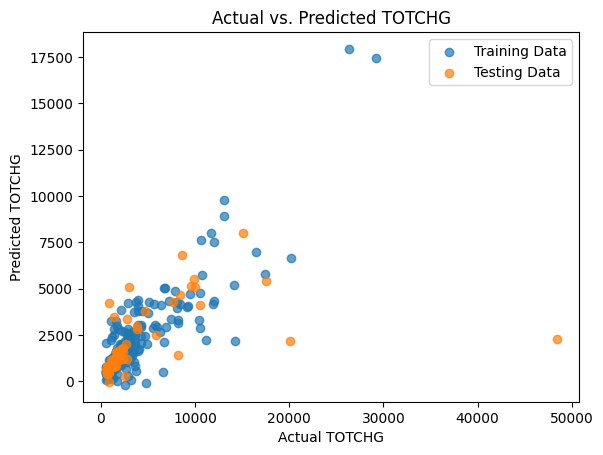

In [52]:
# Scatter plot for training data
plt.scatter(Y_train, train_predictions, label='Training Data', alpha=0.7)
# Scatter plot for testing data
plt.scatter(Y_test, test_predictions, label='Testing Data', alpha=0.7)

plt.xlabel('Actual TOTCHG')
plt.ylabel('Predicted TOTCHG')
plt.title('Actual vs. Predicted TOTCHG')
plt.legend()
plt.show()

